In [1]:
import numpy as np
import xarray as xr
import cmocean
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
%matplotlib inline

In [2]:
basedir = '/data/scratch/rpa/arabian_sea/'

In [3]:
grid = xr.open_dataset(os.path.join(basedir, 'AS24th_gridfile.nc'))

In [4]:
data_avg01 = xr.open_dataset(os.path.join(basedir, 'AVG_FILES/roms_avg_M01.nc'), engine='netcdf4')

In [89]:
SSS = data_avg01.salt
SSS

<xarray.DataArray 'salt' (time: 10, s_rho: 32, eta_rho: 898, xi_rho: 1082)>
[310923520 values with dtype=float32]
Coordinates:
  * xi_rho   (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * eta_rho  (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * s_rho    (s_rho) float32 -0.984375 -0.953125 -0.921875 -0.890625 ...
    lon_rho  (eta_rho, xi_rho) float32 33.05 33.0917 33.1333 33.175 33.2167 ...
    lat_rho  (eta_rho, xi_rho) float32 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 ...
  * time     (time) float32 2.80066e+08 2.80325e+08 2.80584e+08 2.80843e+08 ...
Attributes:
    long_name: averaged salinity
    units: PSU
    field: salinity, scalar, series
    standard_name: sea_water_salinity

In [90]:
w = data_avg01.omega
w

<xarray.DataArray 'omega' (time: 10, s_w: 33, eta_rho: 898, xi_rho: 1082)>
[320639880 values with dtype=float32]
Coordinates:
  * xi_rho   (xi_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * eta_rho  (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * s_w      (s_w) float32 -1.0 -0.96875 -0.9375 -0.90625 -0.875 -0.84375 ...
    lon_rho  (eta_rho, xi_rho) float32 33.05 33.0917 33.1333 33.175 33.2167 ...
    lat_rho  (eta_rho, xi_rho) float32 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 ...
  * time     (time) float32 2.80066e+08 2.80325e+08 2.80584e+08 2.80843e+08 ...
Attributes:
    long_name: averaged S-coordinate vertical momentum component
    units: meter second-1
    field: omega, scalar, series

In [91]:
u = data_avg01.u
v = data_avg01.v
xi_inv = data_avg01.pn
eta_inv = data_avg01.pm

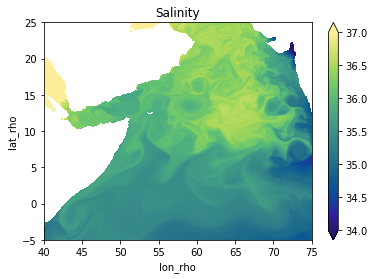

In [93]:
nt = 0
SSS[nt,-1].where(grid.mask_rho==1).plot(vmin=34, vmax=37, cmap=cmocean.cm.haline,
                x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("Salinity")

In [94]:
D_rho = SSS.s_rho * grid.h
D_rho.coords['lat_rho'] = SSS.lat_rho
D_rho.coords['lon_rho'] = SSS.lon_rho
D_rho

<xarray.DataArray (s_rho: 32, eta_rho: 898, xi_rho: 1082)>
array([[[ -1.968750e+01,  -1.968750e+01, ...,  -4.956065e+03,  -4.956065e+03],
        [ -1.968750e+01,  -1.968750e+01, ...,  -4.956065e+03,  -4.956065e+03],
        ..., 
        [ -1.968750e+01,  -1.968750e+01, ...,  -1.968750e+01,  -1.968750e+01],
        [ -1.968750e+01,  -1.968750e+01, ...,  -1.968750e+01,  -1.968750e+01]],

       [[ -1.906250e+01,  -1.906250e+01, ...,  -4.798729e+03,  -4.798729e+03],
        [ -1.906250e+01,  -1.906250e+01, ...,  -4.798729e+03,  -4.798729e+03],
        ..., 
        [ -1.906250e+01,  -1.906250e+01, ...,  -1.906250e+01,  -1.906250e+01],
        [ -1.906250e+01,  -1.906250e+01, ...,  -1.906250e+01,  -1.906250e+01]],

       ..., 
       [[ -9.375000e-01,  -9.375000e-01, ...,  -2.360031e+02,  -2.360031e+02],
        [ -9.375000e-01,  -9.375000e-01, ...,  -2.360031e+02,  -2.360031e+02],
        ..., 
        [ -9.375000e-01,  -9.375000e-01, ...,  -9.375000e-01,  -9.375000e-01],
        [ -9.

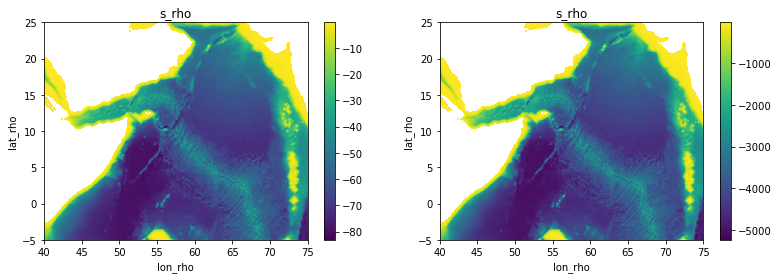

In [103]:
plt.figure(figsize=(13,4))

plt.subplot(121)
D_rho[-1].where(grid.mask_rho==1).plot(x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("s_rho")

plt.subplot(122)
D_rho[0].where(grid.mask_rho==1).plot(x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("s_rho")

In [97]:
D_w = w.s_w * grid.h
D_w.coords['lat_rho'] = w.lat_rho
D_w.coords['lon_rho'] = w.lon_rho
D_w

<xarray.DataArray (s_w: 33, eta_rho: 898, xi_rho: 1082)>
array([[[ -2.000000e+01,  -2.000000e+01, ...,  -5.034732e+03,  -5.034732e+03],
        [ -2.000000e+01,  -2.000000e+01, ...,  -5.034732e+03,  -5.034732e+03],
        ..., 
        [ -2.000000e+01,  -2.000000e+01, ...,  -2.000000e+01,  -2.000000e+01],
        [ -2.000000e+01,  -2.000000e+01, ...,  -2.000000e+01,  -2.000000e+01]],

       [[ -1.937500e+01,  -1.937500e+01, ...,  -4.877397e+03,  -4.877397e+03],
        [ -1.937500e+01,  -1.937500e+01, ...,  -4.877397e+03,  -4.877397e+03],
        ..., 
        [ -1.937500e+01,  -1.937500e+01, ...,  -1.937500e+01,  -1.937500e+01],
        [ -1.937500e+01,  -1.937500e+01, ...,  -1.937500e+01,  -1.937500e+01]],

       ..., 
       [[ -6.250000e-01,  -6.250000e-01, ...,  -1.573354e+02,  -1.573354e+02],
        [ -6.250000e-01,  -6.250000e-01, ...,  -1.573354e+02,  -1.573354e+02],
        ..., 
        [ -6.250000e-01,  -6.250000e-01, ...,  -6.250000e-01,  -6.250000e-01],
        [ -6.25

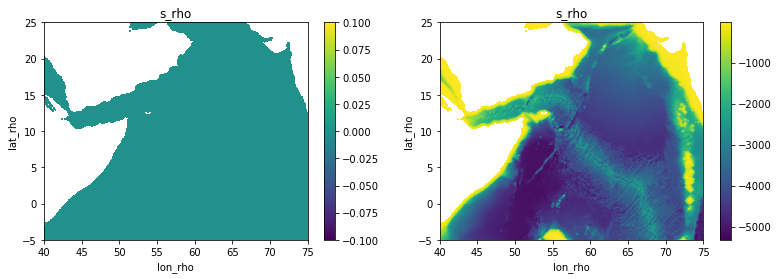

In [102]:
plt.figure(figsize=(13,4))

plt.subplot(121)
D_w[-1].where(grid.mask_rho==1).plot(x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("s_rho")

plt.subplot(122)
D_w[0].where(grid.mask_rho==1).plot(x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("s_rho")

In [99]:
Hz = D_w.diff('s_w')
Hz

<xarray.DataArray (s_w: 32, eta_rho: 898, xi_rho: 1082)>
array([[[   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        [   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        ..., 
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ],
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ]],

       [[   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        [   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        ..., 
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ],
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ]],

       ..., 
       [[   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        [   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        ..., 
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ],
        [   0.625   ,    0.625   , ...,    0.625   ,    0.625   ]],

       [[   0.625   ,    0.625   , ...,  157.335389,  157.335389],
        [  

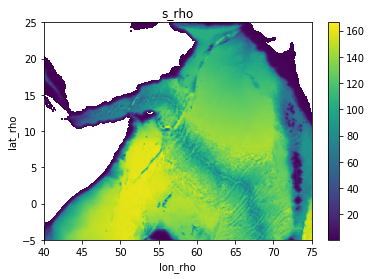

In [101]:
Hz[-1].where(grid.mask_rho==1).plot(x='lon_rho', y='lat_rho')
plt.xlim([40,75])
plt.ylim([-5,25])
plt.title("s_rho")

# Let's get the salinity flux $(\boldsymbol{v}\ s)$

$$\boldsymbol{v}\ s = \bigg( \frac{u \overline{H_z}^\xi \overline{s}^\xi}{\overline{n}^\xi}, \frac{v \overline{H_z}^\eta \overline{s}^\eta}{\overline{m}^\eta}, \overline{s}^\sigma \frac{H_z \Omega}{m n} \bigg)$$

The $\xi$ component of the flux is

$$u \frac{\overline{H_z}^\xi \overline{s}^\xi}{\overline{n}^\xi} = u \frac{\overline{H_z}^\xi \overline{s}^\xi}{\overline{(\Delta \xi)^{-1}}^\xi} \approx u\ \overline{H_z}^\xi \overline{\Delta \xi}^\xi \overline{s}^\xi$$

In [104]:
Hz_xi = .5 * (Hz.roll(xi_rho=-1).values + Hz.values)[:,:,:-1]
SSS_xi = .5 * (SSS.roll(xi_rho=-1).values + SSS.values)[:,:,:,:-1]
n_xi = .5 * (xi_inv.roll(xi_rho=-1).values + xi_inv.values)[:,:-1]

In [121]:
print(u)
print(grid.mask_u)
print(grid.mask_rho)
print(np.ma.masked_array(u[0, 0].values, grid.mask_u.values==0).shape)

<xarray.DataArray 'u' (time: 10, s_rho: 32, eta_rho: 898, xi_u: 1081)>
array([[[[ 0.      , ..., -0.002939],
         ..., 
         [ 0.      , ...,  0.      ]],

        ..., 
        [[ 0.      , ...,  0.134266],
         ..., 
         [ 0.      , ...,  0.      ]]],


       ..., 
       [[[ 0.      , ..., -0.00539 ],
         ..., 
         [ 0.      , ...,  0.      ]],

        ..., 
        [[ 0.      , ...,  0.434329],
         ..., 
         [ 0.      , ...,  0.      ]]]], dtype=float32)
Coordinates:
  * xi_u     (xi_u) float32 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * eta_rho  (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * s_rho    (s_rho) float32 -0.984375 -0.953125 -0.921875 -0.890625 ...
    lon_u    (eta_rho, xi_u) float32 33.0708 33.1125 33.1542 33.1958 33.2375 ...
    lat_u    (eta_rho, xi_u) float32 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 ...
  * time     (time) float32 2.80066e+08 2.80325e+08 2.80584e+08 2.80843e+08 ...
Attributes:

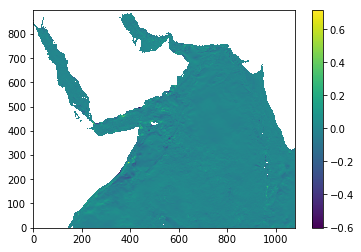

In [143]:
plt.imshow(np.ma.masked_array((u.values)[0,0], grid.mask_u.values==0), origin='bottom')
plt.colorbar()

In [135]:
print(u.values.shape, Hz_xi[np.newaxis].shape, SSS_xi.shape, n_xi[np.newaxis, np.newaxis].shape)

(10, 32, 898, 1081) (1, 32, 898, 1081) (10, 32, 898, 1081) (1, 1, 898, 1081)


In [154]:
# us = xr.DataArray(u.values * (Hz_xi[np.newaxis] * SSS_xi) * n_xi[np.newaxis, np.newaxis]**-1,
#                  coords=u.coords, dims=u.dims)
us = u * SSS_xi
print(us.shape)

(10, 32, 898, 1081)


In [151]:
us

<xarray.DataArray 'u' (time: 10, s_rho: 32, eta_rho: 898, xi_u: 1081)>
array([[[[        0.      , ...,    -74024.552521],
         ..., 
         [        0.      , ...,         0.      ]],

        ..., 
        [[        0.      , ...,   3363394.053942],
         ..., 
         [        0.      , ...,         0.      ]]],


       ..., 
       [[[        0.      , ...,   -135753.542541],
         ..., 
         [        0.      , ...,         0.      ]],

        ..., 
        [[        0.      , ...,  10858145.012127],
         ..., 
         [        0.      , ...,         0.      ]]]])
Coordinates:
  * xi_u     (xi_u) float32 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
  * eta_rho  (eta_rho) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * s_rho    (s_rho) float32 -0.984375 -0.953125 -0.921875 -0.890625 ...
    lon_u    (eta_rho, xi_u) float32 33.0708 33.1125 33.1542 33.1958 33.2375 ...
    lat_u    (eta_rho, xi_u) float32 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.3 -5.

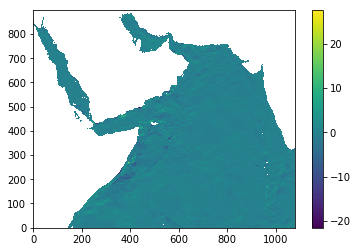

In [155]:
plt.imshow(np.ma.masked_array(us[0,0].values, 
                              grid.mask_u.values==0), 
           origin='bottom')
plt.colorbar()
# plt.xlim([40,75])
# plt.ylim([-5,25])
# plt.title("s_rho")